In [1]:
# Welcome to Jupyter!

a = [-512,  2304, -4608, 5376,  -4032,  2016, -672, 144, - 18, 1] # polynomial coefficients

In [4]:
def horner_method(x, *coef):
    n = len(coef)-1
    p = coef[n]
    for i in range(n-1, -1, -1):
        p = x*p + coef[i]
#         print(p)
    
    return p

In [3]:
horner_method(1.99, *a)

-16.01
112.14009999999999
-448.841201
1122.8060100100001
-1797.6160400800995
1798.7440802406018
-1028.4992803212026
257.2864321608067
5.343281372915953e-12


5.343281372915953e-12

Погрешность ~ 10^-12

In [5]:
def func(x):
    return (x-2)**9

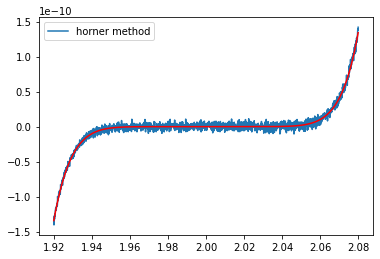

In [6]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(1.92, 2.08, 1600) # step = 10^-4

horner = np.vectorize(horner_method)
f = np.vectorize(func)

plt.plot(X, horner(X, *a), label='horner method')
plt.plot(X, f(X), color='red')
plt.legend()

plt.show()

Колебания значений функции, вычисленных по схеме Горнера, связаны с ошибкой округления. 

Коэффициенты a[i] -- знакопеременные большие (~10^3) величины, и при вычислении p значения также максимально достигают порядка 10^3. В итоге при вычитании больших близких по значению чисел накапливается ошибка округления. Тип float в питоне имеет двойную точность, машинная эпсилон = 10^-16, поэтому оценим погрешность как n * 10^(3-16) ~ 10^(-12), что согласуется с расчётом. 
При вычислении значений по формуле (x-2)^9 мы ожидаем погрешность не хуже 10^-16, то есть гладкую кривую на графике.

В данном случае вычисления по схеме Горнера непригодны из-за больших коэффиентов многочлена, то есть из-за большой кратности корня.